In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# importing dataset

dataset = pd.read_csv("Social_Network_Ads.csv")
print(dataset)

X = dataset.iloc[:,[2,3]].values

y=  dataset.iloc[:,4].values


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# spliting datset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)


In [5]:
# feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X =  StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)




In [6]:
# fitting logisticregression to trainnig dataset

from sklearn.linear_model import LogisticRegression
classifier =  LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# prediction of test_set using Logisticregression

y_pred = classifier.predict(X_test) 

In [8]:
# making confusion matrix

from sklearn.metrics import confusion_matrix ,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

# accuracy
print(accuracy_score(y_test, y_pred))

[[65  3]
 [ 8 24]]
0.89


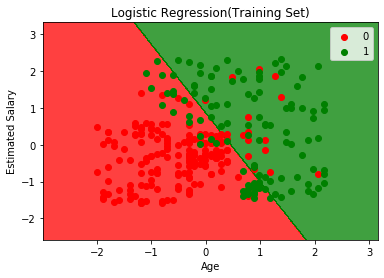

In [9]:
# Visualizing the Train set results

from matplotlib.colors import ListedColormap    
X_set,y_set = X_train,y_train 

X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step  = 0.01))


# ( X_set[:,0].min() - 1 {select min.value from col 0, then  adding -1}                 
#   X_set[:,0].max()+1)  {select max().value from col 0 then adding +1}
#   X_Set use with minus 1 and plus 1 to prevent ponits to be squeezed #on the axes.
#   Create the grid. step=0.01 means all the pixels were actually with  0.01 resolution. min and max of the 
#   X_Set use with minus ana plus one to prevent ponits to be squeezed on the axes.

##################################################################################
#  This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#  points and the blue pixel points. contourf function make the contour #between red and blue regions.
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))


#plot the limits of the age(X1) and the estimated salary(X2) lines.
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

#This loop here plots all the data points that are the real values.
      
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], color = ListedColormap(('red','green'))(i) ,label= j)
     # show scatter plot

#Add the name of the plot and the labels.
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

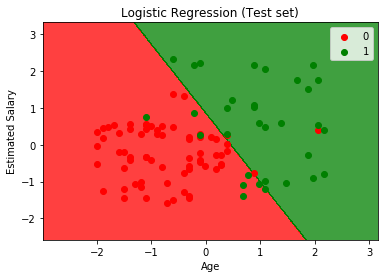

In [10]:
# Visualizing the Test set results

from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

#  This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#  points and the blue pixel points. contour function make the contour #between red and blue regions.

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))


#plot the limits of the age(X1) and the estimated salary(X2) lines.

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#This loop here plots all the data points that are the real values.

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)


# Add the name of the plot and the labels.

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
